In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import pickle
import warnings
warnings.filterwarnings('ignore', category=UserWarning)
warnings.filterwarnings('ignore', category=RuntimeWarning)
warnings.filterwarnings('ignore', category=FutureWarning)
pd.options.mode.chained_assignment = None

In [2]:
df = pd.read_excel('Copper_Set.xlsx')
df.sample(5)

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
40796,61B7DEF6-600B-411D-8145-60ABC4BB04DD,20210210.0,129.28295,30198808.0,26.0,Won,W,10.0,3.00,1212.0,NaN,1670798778,20210401.0,832.0
36140,C311BDF9-5720-446B-8B55-01C795C74871,20210219.0,7.872302,30160001.0,28.0,Won,W,41.0,0.55,1000.0,ZPTEMNA10000055005,611993,20210701.0,1097.0
126365,7550095C-AEE6-4C48-9BD4-1C028C139C89,20201009.0,21.966705,30340120.0,26.0,Lost,S,10.0,3.00,1000.0,0000000000000000000000000000000008601953,164141591,20210101.0,697.0
58266,839C17BF-A2F0-427D-A5A7-D0EF66F3C9BD,20210119.0,72.070125,30205434.0,27.0,Won,W,10.0,6.00,1235.0,S420MC,1670798778,20210401.0,862.0
152690,9ADFC036-2231-4B9F-AF4D-0FD4DE0A3875,20200831.0,27.564288,30272289.0,77.0,Lost,S,10.0,1.95,426.0,NaN,628112,20201001.0,719.0


In [3]:
#check the Datatypes of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


In [4]:
# Finding the null values
print("Shape of the dataframe : ",df.shape)
df.isnull().sum(axis=0)

Shape of the dataframe :  (181673, 14)


id                   2
item_date            1
quantity tons        0
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        1
selling_price        1
dtype: int64

In [5]:
df['thickness'].fillna(value=df['thickness'].mean(), inplace=True)
df['material_ref'].fillna('unknown', inplace=True)

# dropping the material reference column 
#df.drop(columns=['material_ref'],inplace=True)

# deleting the remaining null values as they are less than 1% of data which can be neglected
df = df.dropna()

In [6]:
# dealing with data in wrong format 
df['item_date'] = pd.to_datetime(df['item_date'], format='%Y%m%d', errors='coerce').dt.date
df['quantity tons'] = pd.to_numeric(df['quantity tons'], errors='coerce')
df['customer'] = pd.to_numeric(df['customer'], errors='coerce', downcast='signed')
df['country'] = pd.to_numeric(df['country'], errors='coerce', downcast='signed')
df['application'] = pd.to_numeric(df['application'], errors='coerce')
df['thickness'] = pd.to_numeric(df['thickness'], errors='coerce')
df['width'] = pd.to_numeric(df['width'], errors='coerce')
df['product_ref'] = pd.to_numeric(df['product_ref'], errors='coerce', downcast='signed')
df['delivery date'] = pd.to_datetime(df['delivery date'], format='%Y%m%d', errors='coerce').dt.date
df['selling_price'] = pd.to_numeric(df['selling_price'], errors='coerce')
df['material_ref'] = df['material_ref'].str.lstrip('0')

In [7]:
df.describe()

,quantity tons,customer,country,application,thickness,width,product_ref,selling_price
count,1.816360e+05,1.816370e+05,181637.000000,181637.000000,181637.000000,181637.000000,1.816370e+05,1.816370e+05
mean,5.876071e+03,3.023251e+07,44.893161,25.616102,2.564160,1295.267286,4.740424e+08,1.918333e+03
std,2.349314e+06,1.005617e+05,24.404289,17.754059,6.572534,261.641574,7.175415e+08,3.318276e+05
min,-2.000000e+03,1.245800e+04,25.000000,2.000000,0.180000,1.000000,6.117280e+05,-1.160000e+03
25%,1.096855e+01,3.019688e+07,26.000000,10.000000,0.700000,1180.000000,6.119930e+05,6.690000e+02
50%,3.036402e+01,3.020524e+07,30.000000,15.000000,1.500000,1250.000000,6.406650e+05,8.120000e+02
75%,6.716166e+01,3.028042e+07,78.000000,41.000000,3.000000,1500.000000,1.332077e+09,9.530000e+02
max,1.000000e+09,3.040818e+07,113.000000,99.000000,2500.000000,2990.000000,1.722208e+09,1.000010e+08


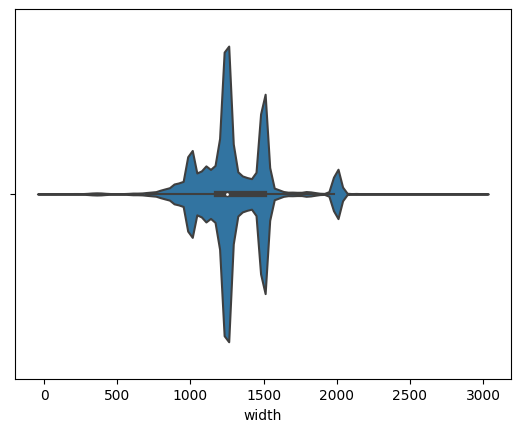

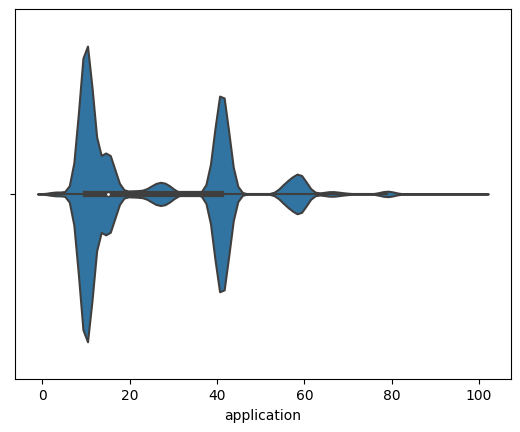

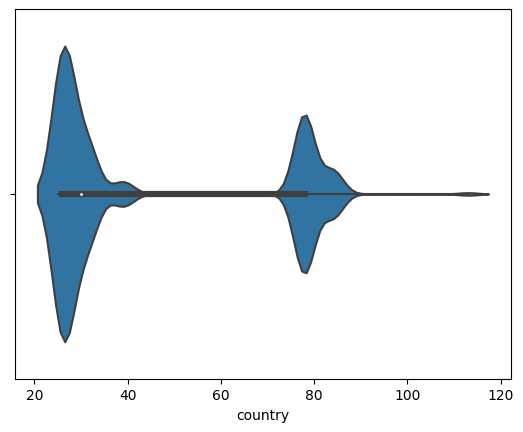

In [8]:
sns.violinplot(x=df["width"])
plt.show()

sns.violinplot(x=df["application"])
plt.show()

sns.violinplot(x=df["country"])
plt.show()

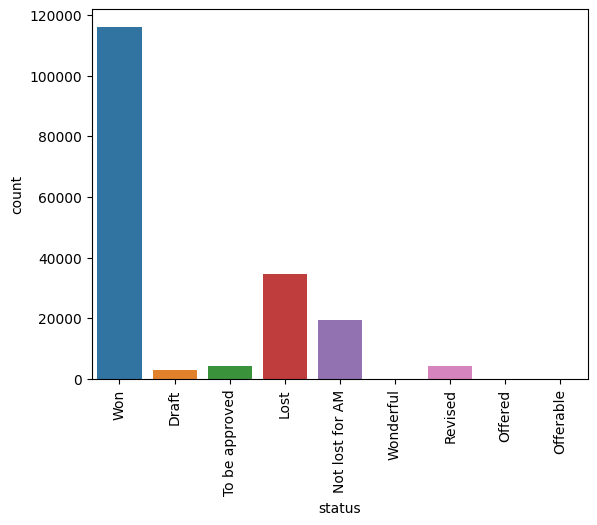

In [9]:
# count plot on status 
sns.countplot(x=df['status'])
plt.xticks(rotation=90)
plt.show()

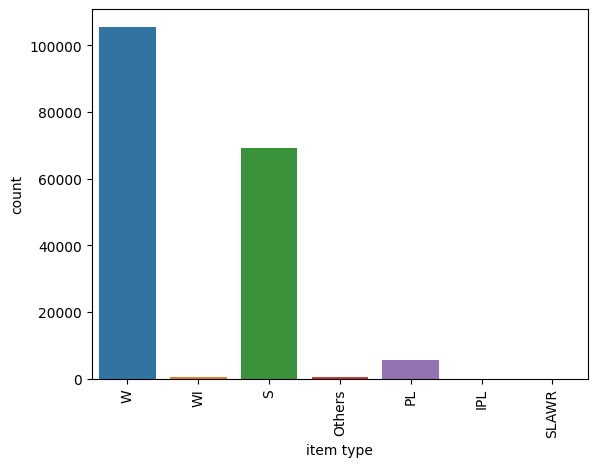

In [10]:
# count plot on status 
sns.countplot(x=df['item type'])
plt.xticks(rotation=90)
plt.show()

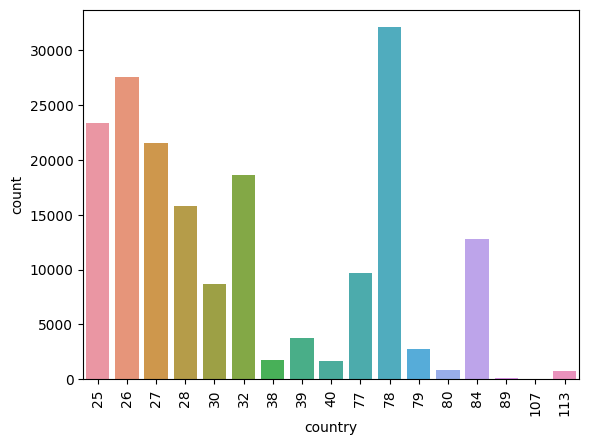

In [11]:
sns.countplot(x=df['country'])
plt.xticks(rotation=90)
plt.show()

# Regression EDA

<Axes: >

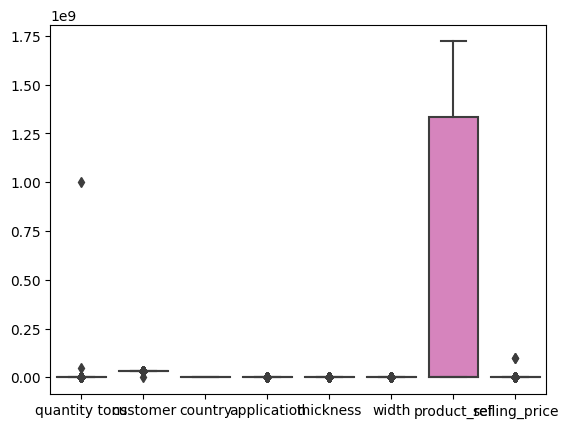

In [12]:
Rdf = df.copy()

#draw boxplot
sns.boxplot(data = Rdf)

In [13]:
a = Rdf['selling_price'] <= 0
print(a.sum())
Rdf.loc[a, 'selling_price'] = np.nan

a = Rdf['quantity tons'] <= 0
print(a.sum())
Rdf.loc[a, 'quantity tons'] = np.nan

a = Rdf['thickness'] < 0
print(a.sum())


7
4
0


In [14]:
Rdf.isnull().sum()

id               0
item_date        2
quantity tons    5
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    2
selling_price    7
dtype: int64

In [15]:
# deleting the remaining null values as they are less than 1% of data which can be neglected
Rdf = Rdf.dropna()

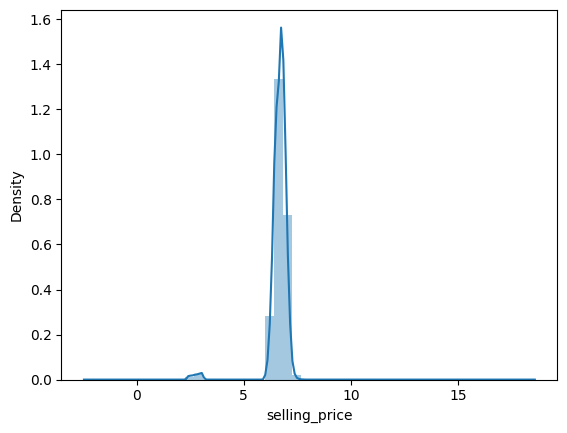

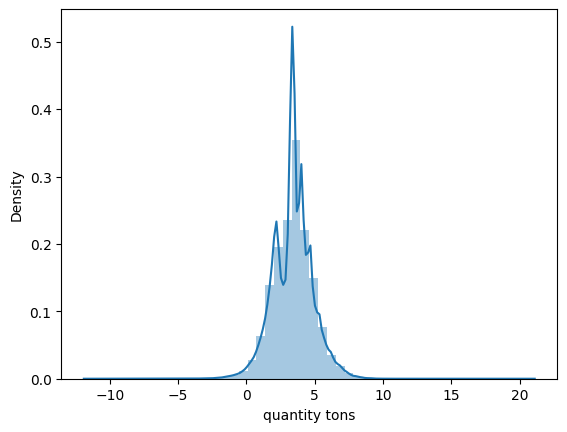

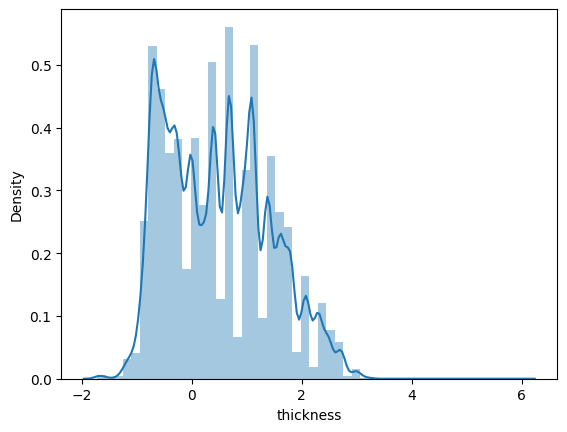

In [16]:
Rdf['selling_price'] = np.log(Rdf['selling_price'])
sns.distplot(Rdf['selling_price'])
plt.show()

Rdf['quantity tons'] = np.log(Rdf['quantity tons'])
sns.distplot(Rdf['quantity tons'])
plt.show()

Rdf['thickness'] = np.log(Rdf['thickness'])
sns.distplot(Rdf['thickness'])
plt.show()

In [17]:
#use ordinal encoder to convert categorical data into numerical data.
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()
Rdf[['status','item type']] = OE.fit_transform(Rdf[['status','item type']])

pickle.dump(OE,open('Models\\ROE.pkl','wb'))

In [18]:
#split data into X, y
X = Rdf[['quantity tons','status','item type','application','thickness','width','country','customer','product_ref']]
y = Rdf['selling_price']

In [19]:
X.corr()

,quantity tons,status,item type,application,thickness,width,country,customer,product_ref
quantity tons,1.000000,-0.101467,-0.321416,0.063989,0.042006,0.034433,-0.088901,0.080141,0.064067
status,-0.101467,1.000000,0.242643,0.132680,-0.121853,-0.093669,0.090484,-0.033417,-0.069924
item type,-0.321416,0.242643,1.000000,0.169044,-0.101261,-0.092370,0.129975,-0.090533,-0.089641
application,0.063989,0.132680,0.169044,1.000000,-0.197565,-0.204454,-0.019330,0.000896,-0.131876
thickness,0.042006,-0.121853,-0.101261,-0.197565,1.000000,0.387244,-0.065205,0.079971,0.234332
width,0.034433,-0.093669,-0.092370,-0.204454,0.387244,1.000000,0.055282,0.050526,-0.034422
country,-0.088901,0.090484,0.129975,-0.019330,-0.065205,0.055282,1.000000,0.083575,-0.147375
customer,0.080141,-0.033417,-0.090533,0.000896,0.079971,0.050526,0.083575,1.000000,-0.032332
product_ref,0.064067,-0.069924,-0.089641,-0.131876,0.234332,-0.034422,-0.147375,-0.032332,1.000000


In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.3, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(127134, 9)
(54487, 9)
(127134,)
(54487,)


In [21]:
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
X_train = SS.fit_transform(X_train)
X_test = SS.transform(X_test)

pickle.dump(SS,open('Models/RStandardScaler.pkl','wb'))

In [22]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

# Decision Tree Regressor

In [23]:
tree = DecisionTreeRegressor()
#tree.fit(X_train, Y_train)

# hyperparameters
param_grid = {'max_depth': [10, 20, 30],
              'min_samples_split': [10,15,20],
              'min_samples_leaf': [4,6,8,10],
              'max_features': ['auto', 'sqrt', 'log2']}
# gridsearchcv
grid_search = GridSearchCV(estimator=tree, param_grid=param_grid, cv=5)
grid_search.fit(X_train, Y_train)
print("Best hyperparameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

Best hyperparameters: {'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 10, 'min_samples_split': 15}


In [24]:
print("Training accuracy of the model is {:.2f}".format(best_model.score(X_train, Y_train)))
print("Testing accuracy of the model is {:.2f}".format(best_model.score(X_test, Y_test)))

Training accuracy of the model is 0.94
Testing accuracy of the model is 0.92


In [25]:
training_data_predction = best_model.predict(X_train)
r_train_score1 = metrics.r2_score(Y_train, training_data_predction)
print("R squared score of Training Set : ", r_train_score1)

test_data_predction = best_model.predict(X_test)
r2_test_dt = metrics.r2_score(Y_test, test_data_predction)
print("R squared score of Test Set : ", r2_test_dt)

mae_test_dt = metrics.mean_absolute_error(Y_test, test_data_predction)
print("Mean Absolute Error score of Test Set : ", mae_test_dt)

mse_test_dt = metrics.mean_squared_error(Y_test, test_data_predction)
print("Mean Squared Error score of Test Set : ", mse_test_dt)

R squared score of Training Set :  0.9390404003414288
R squared score of Test Set :  0.9222605863631298
Mean Absolute Error score of Test Set :  0.11802836361471583
Mean Squared Error score of Test Set :  0.02475776917237195


In [26]:
pickle.dump(best_model,open('Models/Reg_model.pkl','wb'))

# Classification

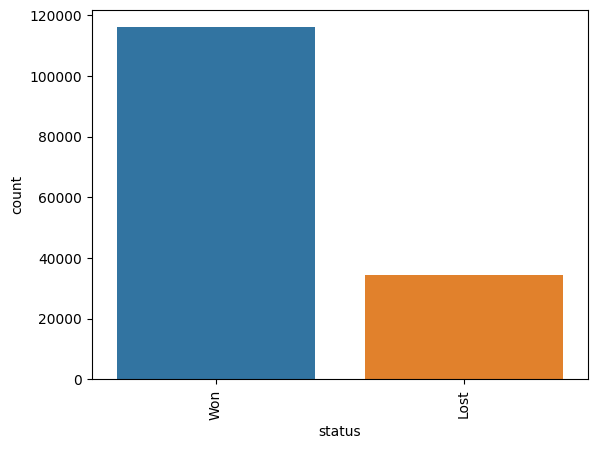

In [27]:
# Removing the status other than won and lost
dfc = df[df['status'].isin(('Won','Lost')) ]

# count plot on status 
sns.countplot(x=dfc['status'])
plt.xticks(rotation=90)
plt.show()

In [28]:
#use ordinal encoder to convert categorical data into numerical data.
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()
dfc['item type'] = OE.fit_transform(dfc[['item type']])

pickle.dump(OE,open('Models/COE.pkl','wb'))

dfc.status.replace('Won', 1 ,inplace= True)
dfc.status.replace('Lost', 0 ,inplace= True)

Text(0.5, 0, 'Values')

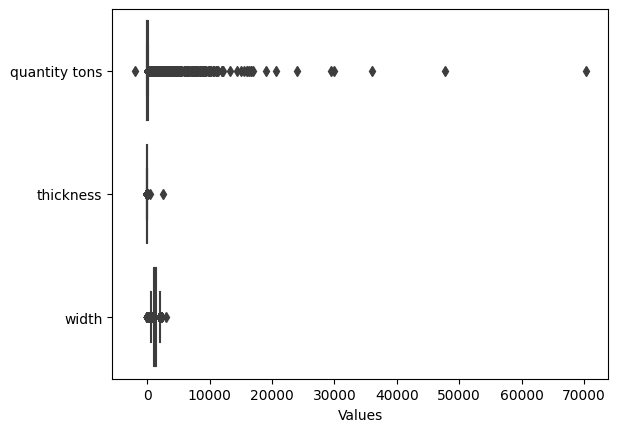

In [29]:
columns = ['quantity tons','thickness','width'] 

plt.figure()
sns.boxplot(data=dfc[columns], orient='h')  
plt.xlabel('Values')

In [30]:
# Treat Outliers using IQR 
# Find InterQuantile range 
up_low_col = dict()
for i in columns:
    q1 = dfc[i].quantile(0.25)
    q3 = dfc[i].quantile(0.75)
    iqr = q3-q1
    upperL = q3+1.5*iqr
    lowerL = q1-1.5*iqr
    dfc[i] = np.where(dfc[i]>upperL,upperL,np.where(dfc[i]<lowerL,lowerL,dfc[i]))
    up_low_col.update({i:[upperL,lowerL]})


Text(0.5, 0, 'Values')

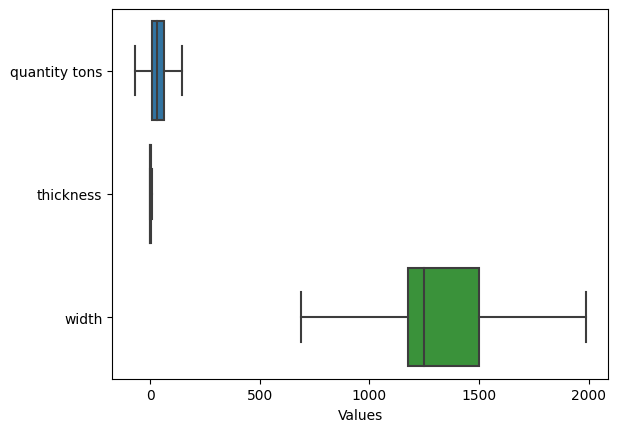

In [31]:
plt.figure()
sns.boxplot(data=dfc[columns], orient='h')  
plt.xlabel('Values')

In [32]:
#split data into X, y
dfc = dfc.dropna()
X = dfc[['quantity tons','selling_price','item type','application','thickness','width','country','customer','product_ref']] 
Y = dfc[['status']]


In [33]:
# splitting the dataset
from sklearn.model_selection import train_test_split
X_train,X_test ,y_train ,y_test = train_test_split(X,Y,test_size=0.2,random_state=100)
print("Train shape ",X_train.shape)
print("Test shape ",X_test.shape)


Train shape  (120348, 9)
Test shape  (30087, 9)


In [34]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler()
X_train = X_std.fit_transform(X_train)
X_test = X_std.transform(X_test)

pickle.dump(X_std,open('Models/CStandardScaler.pkl','wb'))

In [35]:
#import classifier algorithms.
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import classification_report,accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc


Training Score :  0.8161913783361585
Testing Score :  0.81543523781035
              precision    recall  f1-score   support

           0       0.64      0.47      0.54      6989
           1       0.85      0.92      0.88     23098

    accuracy                           0.82     30087
   macro avg       0.75      0.69      0.71     30087
weighted avg       0.80      0.82      0.80     30087

confusion matrix 
 [[ 3251  3738]
 [ 1815 21283]]


Text(58.222222222222214, 0.5, 'Truth')

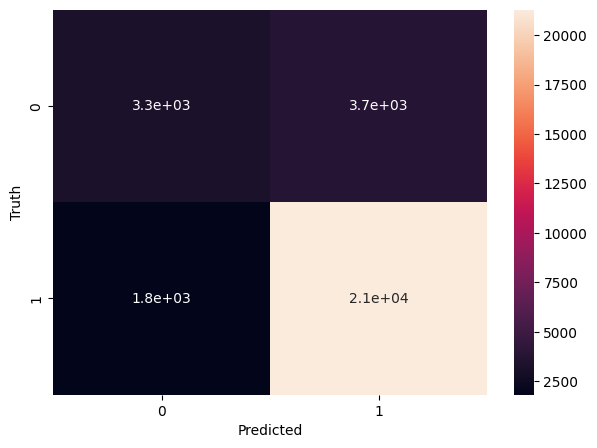

In [36]:
dtc = DecisionTreeClassifier(max_depth = 5, random_state = 1)
dtc.fit(X_train, y_train)
train_score = dtc.score(X_train, y_train)
test_score = dtc.score(X_test, y_test)
y_pred_dtc = dtc.predict(X_test)
print("Training Score : ",train_score)
print("Testing Score : ",test_score)
print(classification_report(y_test,y_pred_dtc ))

cm = confusion_matrix(y_test,y_pred_dtc)
print("confusion matrix \n",cm)
plt.figure(figsize = (7,5))
sns.heatmap(cm, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

Training Score :  0.9026157476651046
Testing Score :  0.8602718782198292
              precision    recall  f1-score   support

           0       0.69      0.74      0.71      6989
           1       0.92      0.90      0.91     23098

    accuracy                           0.86     30087
   macro avg       0.80      0.82      0.81     30087
weighted avg       0.86      0.86      0.86     30087

confusion matrix 
 [[ 5139  1850]
 [ 2354 20744]]


Text(58.222222222222214, 0.5, 'Truth')

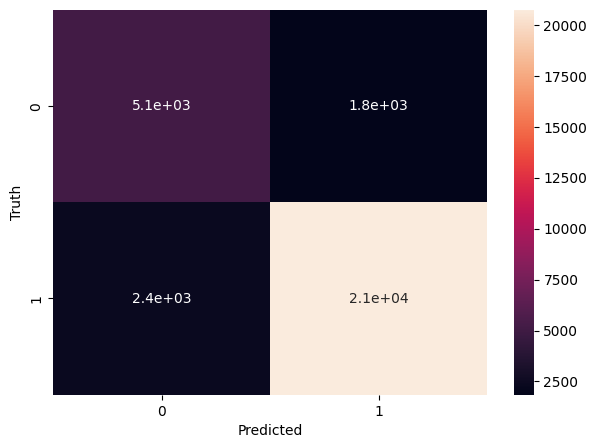

In [37]:
knn = KNeighborsClassifier(n_neighbors = 6)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("Training Score : ",knn.score(X_train, y_train))
print("Testing Score : ",knn.score(X_test, y_test))
print(classification_report(y_test, y_pred_knn))

cm = confusion_matrix(y_test,y_pred_knn)
print("confusion matrix \n",cm)
plt.figure(figsize = (7,5))
sns.heatmap(cm, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

Training Score :  0.8192824143317712
Testing Score :  0.8171967959583873
              precision    recall  f1-score   support

           0       0.79      0.29      0.43      6989
           1       0.82      0.98      0.89     23098

    accuracy                           0.82     30087
   macro avg       0.80      0.63      0.66     30087
weighted avg       0.81      0.82      0.78     30087

confusion matrix 
 [[ 2034  4955]
 [  545 22553]]


Text(58.222222222222214, 0.5, 'Truth')

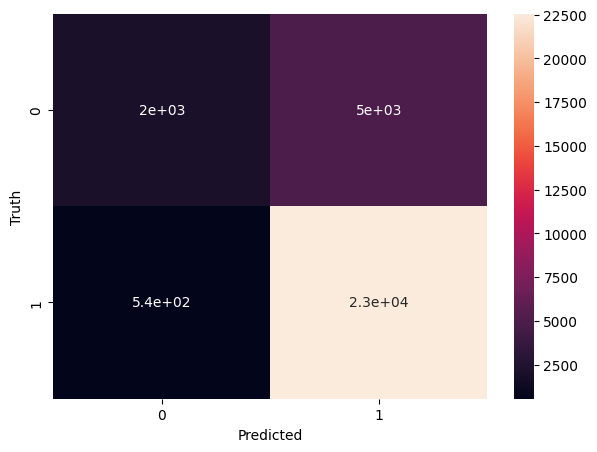

In [38]:
gbc = GradientBoostingClassifier(n_estimators = 30, learning_rate = 0.1,random_state = 28)
gbc.fit(X_train, y_train)
y_pred_gbc = gbc.predict(X_test)
print("Training Score : ",gbc.score(X_train, y_train))
print("Testing Score : ",gbc.score(X_test, y_test))
print(classification_report(y_test, y_pred_gbc))

cm = confusion_matrix(y_test,y_pred_gbc)
print("confusion matrix \n",cm)
plt.figure(figsize = (7,5))
sns.heatmap(cm, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

Training Score :  0.819398743643434
Testing Score :  0.817429454581713
              precision    recall  f1-score   support

           0       0.81      0.28      0.42      6989
           1       0.82      0.98      0.89     23098

    accuracy                           0.82     30087
   macro avg       0.81      0.63      0.65     30087
weighted avg       0.82      0.82      0.78     30087

confusion matrix 
 [[ 3251  3738]
 [ 1815 21283]]


Text(58.222222222222214, 0.5, 'Truth')

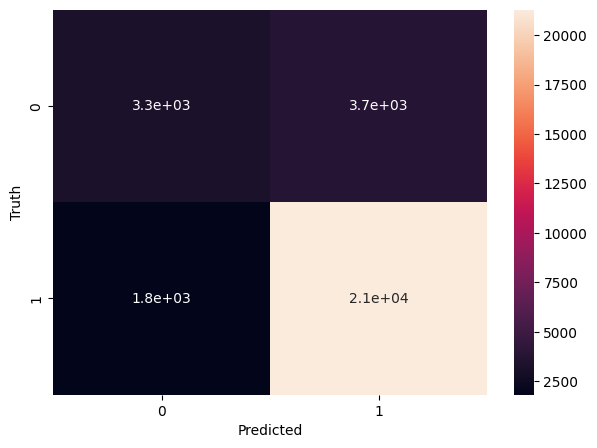

In [39]:
rfc = RandomForestClassifier(n_estimators = 20, max_depth =6,random_state = 35)
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)
print("Training Score : ",rfc.score(X_train, y_train))
print("Testing Score : ",rfc.score(X_test, y_test))
print(classification_report(y_test,y_pred_rfc))

cm = confusion_matrix(y_test,y_pred_dtc)
print("confusion matrix \n",cm)
plt.figure(figsize = (7,5))
sns.heatmap(cm, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

Training Score :  0.7664024329444611
Testing Score :  0.7610595938445176
              precision    recall  f1-score   support

           0       0.44      0.10      0.16      6989
           1       0.78      0.96      0.86     23098

    accuracy                           0.76     30087
   macro avg       0.61      0.53      0.51     30087
weighted avg       0.70      0.76      0.70     30087

confusion matrix 
 [[  681  6308]
 [  881 22217]]


Text(58.222222222222214, 0.5, 'Truth')

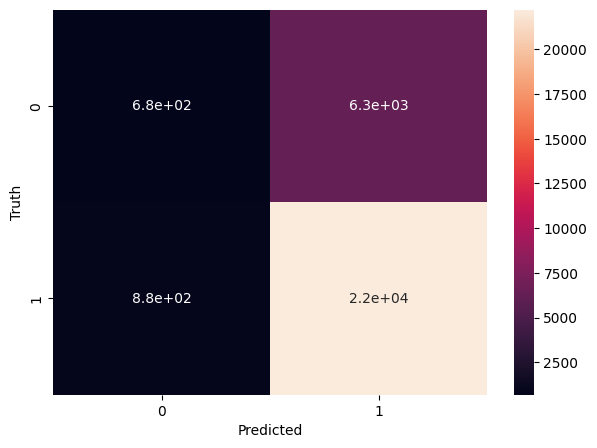

In [40]:
LR = LogisticRegression()
LR.fit(X_train,y_train)
y_pred_lr = LR.predict(X_test)
print("Training Score : ",LR.score(X_train, y_train))
print("Testing Score : ",LR.score(X_test, y_test))
print(classification_report(y_test, y_pred_lr))

cm = confusion_matrix(y_test,y_pred_lr)
print("confusion matrix \n",cm)
plt.figure(figsize = (7,5))
sns.heatmap(cm, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

Training Score :  0.9999335261076212
Testing Score :  0.9279090637152259
              precision    recall  f1-score   support

           0       0.85      0.84      0.84      6989
           1       0.95      0.95      0.95     23098

    accuracy                           0.93     30087
   macro avg       0.90      0.90      0.90     30087
weighted avg       0.93      0.93      0.93     30087

confusion matrix 
 [[ 5880  1109]
 [ 1060 22038]]


Text(58.222222222222214, 0.5, 'Truth')

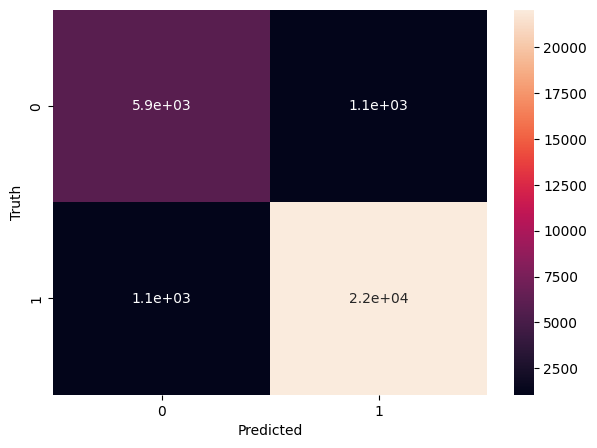

In [41]:
ext = ExtraTreesClassifier(n_estimators=20, random_state=0)
ext.fit(X_train, y_train)
y_pred_ext = ext.predict(X_test)
print("Training Score : ",ext.score(X_train, y_train))
print("Testing Score : ",ext.score(X_test, y_test))
print(classification_report(y_test, y_pred_ext))

cm = confusion_matrix(y_test,y_pred_ext)
print("confusion matrix \n",cm)
plt.figure(figsize = (7,5))
sns.heatmap(cm, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

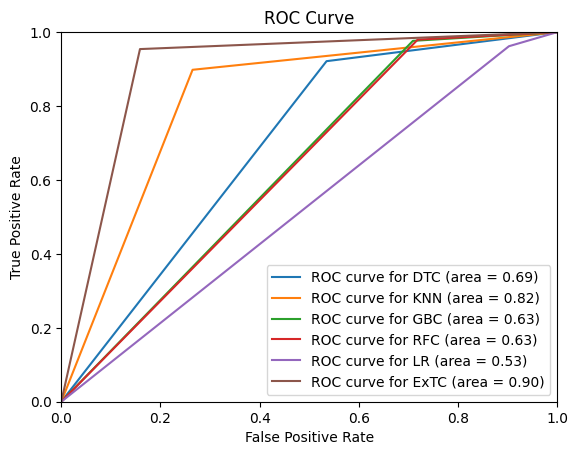

In [42]:
# ROC curve and AUC
fpr_dtc, tpr_dtc, thresholds = roc_curve(y_test, y_pred_dtc)
roc_auc_dtc = auc(fpr_dtc, tpr_dtc)
fpr_knn, tpr_knn, thresholds = roc_curve(y_test, y_pred_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)
fpr_gbc, tpr_gbc, thresholds = roc_curve(y_test, y_pred_gbc)
roc_auc_gbc = auc(fpr_gbc, tpr_gbc)
fpr_rfc, tpr_rfc, thresholds = roc_curve(y_test, y_pred_rfc)
roc_auc_rfc = auc(fpr_rfc, tpr_rfc)
fpr_LR, tpr_LR, thresholds = roc_curve(y_test, y_pred_lr)
roc_auc_LR = auc(fpr_LR, tpr_LR)
fpr_ext, tpr_ext, thresholds = roc_curve(y_test, y_pred_ext)
roc_auc_ext = auc(fpr_ext, tpr_ext)



plt.figure()
plt.plot(fpr_dtc, tpr_dtc, label='ROC curve for DTC (area = %0.2f)' % roc_auc_dtc)
plt.plot(fpr_knn, tpr_knn, label='ROC curve for KNN (area = %0.2f)' % roc_auc_knn)
plt.plot(fpr_gbc, tpr_gbc, label='ROC curve for GBC (area = %0.2f)' % roc_auc_gbc)
plt.plot(fpr_rfc, tpr_rfc, label='ROC curve for RFC (area = %0.2f)' % roc_auc_rfc)
plt.plot(fpr_LR, tpr_LR, label='ROC curve for LR (area = %0.2f)' % roc_auc_LR)
plt.plot(fpr_ext, tpr_ext, label='ROC curve for ExTC (area = %0.2f)' % roc_auc_ext)
#plt.plot([0, 1], [0, 1], 'm-')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [ ]:
pickle.dump(ext,open('Models/Cmodel.pkl','wb'))